# Curate External Datasets

Filter and transform external datasets and save into curated folder

Notes:
- still need to find a way to combine SA2s with suburbs (DONE ? need to check + clean up)
- remove outliers? (areas with 0 population, what about areas with < 100 population?)

In [1]:
import pandas as pd
import geopandas as gpd

## DFFH Suburb Historical Rent Data


Read file

In [2]:
rent_df = pd.read_csv("../data/raw/suburb_rent_hist.csv", index_col = [0, 1])

rent_df.head()

mar_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1143.0   
                Armadale                                        733.0   
                Carlton North                                   864.0   
                Carlton-Parkville                              1339.0   
                CBD-St Kilda Rd                                2132.0   

                                                       mar_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            260.0   
                Armadale                                         200.0   
                Carlton North                                    260.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       jun_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            1134   
                Armadale                                          737   
                Carlton North                                     814   
                Carlton-Parkville                                1304   
                CBD-St Kilda Rd                                  2264   

                                                       jun_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda              260   
                Armadale                                           200   
                Carlton North                                      260   
                Carlton-Parkville                                  260   
                CBD-St Kilda Rd                                    320   

                                                       sep_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1177.0   
                Armadale                                        738.0   
                Carlton North                                   799.0   
                Carlton-Parkville                              1300.0   
                CBD-St Kilda Rd                                2358.0   

                                                       sep_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            270.0   
                Armadale                                         205.0   
                Carlton North                                    265.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       dec_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1178.0   
                Armadale                                        739.0   
                Carlton North                                   736.0   
                Carlton-Parkville                              1320.0   
                CBD-St Kilda Rd                                2361.0   

                                                       dec_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            275.0   
                Armadale                                         210.0   
                Carlton North                                    270.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       mar_2001_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1208.0   
                Armadale                                        718.0   
                Carlton North                                   718.0   
                Carlton-Parkville                              1273.0   
                CBD-St Kilda Rd                                2591.0   

                                                       mar_2001_median  ...  \
I

Filter to suburbs within metropolitan Melbourne

In [3]:
rent_df.groupby(level = 0).count()

,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,mar_2001_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
Ballarat,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Bendigo,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Geelong,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Inner Eastern Melbourne,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Inner Melbourne,22,22,23,23,22,22,22,22,22,22,...,23,23,23,23,23,23,23,23,23,23
Mornington Peninsula,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
North Eastern Melbourne,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
North Western Melbourne,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Other Regional Centres,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Outer Eastern Melbourne,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


All areas except Ballarat, Bendigo, Geelong and Other Regional Centres are part of metropolitan Melbourne


In [4]:
rent_df = rent_df.drop(index = ["Ballarat", "Bendigo", "Geelong", "Other Regional Centres"], level = 0)

rent_df.head()

mar_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1143.0   
                Armadale                                        733.0   
                Carlton North                                   864.0   
                Carlton-Parkville                              1339.0   
                CBD-St Kilda Rd                                2132.0   

                                                       mar_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            260.0   
                Armadale                                         200.0   
                Carlton North                                    260.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       jun_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            1134   
                Armadale                                          737   
                Carlton North                                     814   
                Carlton-Parkville                                1304   
                CBD-St Kilda Rd                                  2264   

                                                       jun_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda              260   
                Armadale                                           200   
                Carlton North                                      260   
                Carlton-Parkville                                  260   
                CBD-St Kilda Rd                                    320   

                                                       sep_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1177.0   
                Armadale                                        738.0   
                Carlton North                                   799.0   
                Carlton-Parkville                              1300.0   
                CBD-St Kilda Rd                                2358.0   

                                                       sep_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            270.0   
                Armadale                                         205.0   
                Carlton North                                    265.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       dec_2000_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1178.0   
                Armadale                                        739.0   
                Carlton North                                   736.0   
                Carlton-Parkville                              1320.0   
                CBD-St Kilda Rd                                2361.0   

                                                       dec_2000_median  \
Inner Melbourne Albert Park-Middle Park-West St Kilda            275.0   
                Armadale                                         210.0   
                Carlton North                                    270.0   
                Carlton-Parkville                                260.0   
                CBD-St Kilda Rd                                  320.0   

                                                       mar_2001_count  \
Inner Melbourne Albert Park-Middle Park-West St Kilda          1208.0   
                Armadale                                        718.0   
                Carlton North                                   718.0   
                Carlton-Parkville                              1273.0   
                CBD-St Kilda Rd                                2591.0   

                                                       mar_2001_median  ...  \
I

Since our scale is suburbs, we can drop the larger regions. Also drop group/region totals

In [5]:
rent_df = rent_df.droplevel(0).drop(index = ["Group Total"])

rent_df.head()

,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,mar_2001_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,1208.0,275.0,...,867,500,855,515,881,500,832,525,786,545
Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,718.0,215.0,...,805,430,851,450,852,450,840,460,751,490
Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,718.0,270.0,...,581,580,535,595,547,600,546,600,490,620
Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,1273.0,260.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,2591.0,320.0,...,17845,365,16792,390,18284,419,17627,450,17426,500


Save into curated folder

In [6]:
rent_df.to_csv("../data/curated/rent_historical_data.csv")

## ABS Suburbs and Localities Boundary Shapefile

Read file

In [197]:
suburb_sf = gpd.read_file("../data/raw/shapefiles/suburb_boundary")

suburb_sf.head()

,sal_code,sal_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8..."
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39..."
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9..."


Filter to only Victorian suburbs. We will filter for metropolitan Melbourne suburbs later

In [198]:
suburb_sf = suburb_sf[suburb_sf["ste_name"] == "Victoria"]

suburb_sf.head()

,sal_code,sal_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
4544,20001,Abbeyard,2,Victoria,AUS,Australia,327.5008,http://linked.data.gov.au/dataset/asgsed3/SAL/...,1.207678,0.033162,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),2,Victoria,AUS,Australia,1.7405,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.092990,0.000178,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,2,Victoria,AUS,Australia,1.5515,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.059374,0.000159,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,2,Victoria,AUS,Australia,10.8319,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.183199,0.001107,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,2,Victoria,AUS,Australia,72.6602,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.514040,0.007381,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."


We can drop the state and country columns as every entry is from Victoria, Australia. Also drop the `loci_uri`, `shape_leng` and `shape_area` columns as they are not relevant to our analysis

In [199]:
suburb_sf = suburb_sf[["sal_code", "sal_name", "areasqkm", "geometry"]]

suburb_sf.head()

,sal_code,sal_name,areasqkm,geometry
4544,20001,Abbeyard,327.5008,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,1.5515,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,10.8319,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,72.6602,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."


## ABS GCCSA Boundary Shapefile

Read file

In [200]:
gccsa_sf = gpd.read_file("../data/raw/shapefiles/gccsa_boundary")

gccsa_sf.head()

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
0,1GSYD,Greater Sydney,0,No change,1,New South Wales,AUS,Australia,12368.6858,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((151.28159 -33.83318, 151.28151..."
1,1RNSW,Rest of NSW,0,No change,1,New South Wales,AUS,Australia,788428.9733,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ..."
2,19499,No usual address (NSW),0,No change,1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
3,19799,Migratory - Offshore - Shipping (NSW),0,No change,1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."


Filter to areas within Victoria

In [201]:
gccsa_sf = gccsa_sf[gccsa_sf["ste_name"] == "Victoria"]

gccsa_sf

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,0,No change,2,Victoria,AUS,Australia,217503.6398,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
6,29499,No usual address (Vic.),0,No change,2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
7,29799,Migratory - Offshore - Shipping (Vic.),0,No change,2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None


The last two rows have no geometry and are irrelevant

In [202]:
gccsa_sf = gccsa_sf.drop([6,7])

gccsa_sf

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,0,No change,2,Victoria,AUS,Australia,217503.6398,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."


Filter columns

In [203]:
gccsa_sf = gccsa_sf[["gcc_code", "gcc_name", "geometry"]]

gccsa_sf

,gcc_code,gcc_name,geometry
4,2GMEL,Greater Melbourne,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."


### Merge Suburbs and Greater Capital City Statistical Areas

Combine the datasets by performing a spatial overlay

In [224]:
sub_gcc_sf = gpd.overlay(suburb_sf, gccsa_sf, how = "intersection", keep_geom_type = False)

sub_gcc_sf.head(10)

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((146.89947 -37.04866, 146.89938 -37.0..."
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79..."
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7..."
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((146.38808 -37.72224, 146.38876 -37.7..."
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((145.76757 -37.26055, 145.76746 -37.2..."
5,20006,Ada,61.6697,2GMEL,Greater Melbourne,"MULTIPOLYGON (((145.80524 -37.87048, 145.80504..."
6,20006,Ada,61.6697,2RVIC,Rest of Vic.,"POLYGON ((145.90392 -37.82403, 145.89654 -37.8..."
7,20007,Adams Estate,0.2154,2RVIC,Rest of Vic.,"POLYGON ((145.53098 -38.42303, 145.53351 -38.4..."
8,20008,Addington,18.5958,2RVIC,Rest of Vic.,"POLYGON ((143.69006 -37.39098, 143.68816 -37.4..."
9,20009,Adelaide Lead,38.5026,2RVIC,Rest of Vic.,"POLYGON ((143.67141 -37.05476, 143.67622 -37.0..."


We want to calculate the areas of the overlayed regions. But first, we have to convert the geometries from latitude, longitude to a projected coordinate reference system (CRS) so we can properly calculate areas. We will use `EPSG:3112` which is a projection for the country of Australia

In [225]:
# Convert CRS
sub_gcc_sf["geometry"] = sub_gcc_sf["geometry"].to_crs("EPSG:3112")

# Calculate area
sub_gcc_sf["ov_area"] = sub_gcc_sf.geometry.area

sub_gcc_sf.head(10)

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((1149079.349 -4226004.907, 1149070.45...",3.295147e+08
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.218 -4292997.899, 973214.546 ...",1.760543e+06
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964135.969 -4288682.853, 964104.722 ...",1.568921e+06
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((1096287.802 -4296132.741, 1096350.27...",1.094753e+07
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((1046353.382 -4239602.965, 1046343.3 ...",7.322478e+07
5,20006,Ada,61.6697,2GMEL,Greater Melbourne,"MULTIPOLYGON (((1043311.966 -4307642.003, 1043...",2.206350e-01
6,20006,Ada,61.6697,2RVIC,Rest of Vic.,"POLYGON ((1052497.688 -4303301.649, 1051462.28...",6.238928e+07
7,20007,Adams Estate,0.2154,2RVIC,Rest of Vic.,"POLYGON ((1013484.155 -4366886.711, 1013691.00...",2.188294e+05
8,20008,Addington,18.5958,2RVIC,Rest of Vic.,"POLYGON ((860910.084 -4238318.905, 860655.38 -...",1.875573e+07
9,20009,Adelaide Lead,38.5026,2RVIC,Rest of Vic.,"POLYGON ((862136.401 -4200848.965, 862560.169 ...",3.875464e+07


Regions with really small areas (like Ada, Greater Melbourne) are likely due to borders touching.

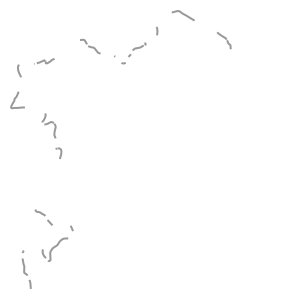

In [226]:
# intersection between metropolitan Melbourne and Ada
sub_gcc_sf.loc[5, "geometry"] 

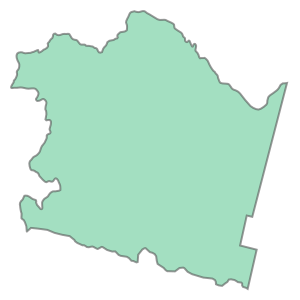

In [227]:
# intersection between regional Melbourne and Ada
sub_gcc_sf.loc[6, "geometry"]

We can clearly see that Ada is a suburb in regional Melbourne. So we discard overlay regions with small areas, as they borders overlapping

In [228]:
sub_gcc_sf = sub_gcc_sf[sub_gcc_sf["ov_area"] > 1000]

sub_gcc_sf.head(10)

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((1149079.349 -4226004.907, 1149070.45...",3.295147e+08
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.218 -4292997.899, 973214.546 ...",1.760543e+06
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964135.969 -4288682.853, 964104.722 ...",1.568921e+06
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((1096287.802 -4296132.741, 1096350.27...",1.094753e+07
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((1046353.382 -4239602.965, 1046343.3 ...",7.322478e+07
6,20006,Ada,61.6697,2RVIC,Rest of Vic.,"POLYGON ((1052497.688 -4303301.649, 1051462.28...",6.238928e+07
7,20007,Adams Estate,0.2154,2RVIC,Rest of Vic.,"POLYGON ((1013484.155 -4366886.711, 1013691.00...",2.188294e+05
8,20008,Addington,18.5958,2RVIC,Rest of Vic.,"POLYGON ((860910.084 -4238318.905, 860655.38 -...",1.875573e+07
9,20009,Adelaide Lead,38.5026,2RVIC,Rest of Vic.,"POLYGON ((862136.401 -4200848.965, 862560.169 ...",3.875464e+07
10,20010,Agnes,15.7167,2RVIC,Rest of Vic.,"POLYGON ((1086404.531 -4402125.945, 1086214.58...",1.599696e+07


Now we can filter suburbs inside metropolitan Melbourne

In [229]:
sub_gcc_sf = sub_gcc_sf[sub_gcc_sf["gcc_name"] == "Greater Melbourne"]

sub_gcc_sf

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.218 -4292997.899, 973214.546 ...",1.760543e+06
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964135.969 -4288682.853, 964104.722 ...",1.568921e+06
11,20011,Aintree,6.7302,2GMEL,Greater Melbourne,"POLYGON ((944615.681 -4282695.394, 944583.876 ...",6.803024e+06
15,20015,Airport West,3.6748,2GMEL,Greater Melbourne,"POLYGON ((963265.54 -4283020.695, 963879.727 -...",3.715018e+06
17,20017,Albanvale,1.8634,2GMEL,Greater Melbourne,"POLYGON ((953370.207 -4285029.166, 953562.054 ...",1.883807e+06
...,...,...,...,...,...,...,...
2993,22916,Yarrambat,15.3453,2GMEL,Greater Melbourne,"POLYGON ((989451.84 -4275313.859, 989486.003 -...",1.550266e+07
2994,22917,Yarraville,5.6587,2GMEL,Greater Melbourne,"POLYGON ((963219.938 -4293547.153, 963269.552 ...",5.724275e+06
3002,22925,Yellingbo,42.4012,2GMEL,Greater Melbourne,"POLYGON ((1017440.534 -4298853.335, 1017441.83...",4.289698e+07
3007,22930,Yering,24.6363,2GMEL,Greater Melbourne,"POLYGON ((1006985.396 -4281586.994, 1007039.42...",2.489721e+07


Drop unnecessary columns and save into curated folder

In [230]:
sub_gcc_sf = sub_gcc_sf.drop(columns = ["gcc_code", "gcc_name", "ov_area"])

sub_gcc_sf.to_file("../data/curated/suburb_boundary", index = False)

## ABS SA2 Boundary Shapefile

Read file

In [39]:
sa2_sf = gpd.read_file("../data/raw/shapefiles/sa2_boundary")

sa2_sf.head()

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.218 -35.366..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.1997 -35.35..."


Filter to areas relevant for analysis

In [40]:
sa2_sf.groupby("gcc_name").count().sort_values("sa2_code", ascending = False).head(10)

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
gcc_name,,,,,,,,,,,,,,,,
Greater Sydney,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373
Greater Melbourne,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
Rest of Qld,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
Rest of NSW,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269
Greater Brisbane,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
Greater Perth,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
Rest of Vic.,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
Australian Capital Territory,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
Greater Adelaide,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112


Since our analysis focuses on regions in metropolitan Melbourne, filter data to SA2s within Greater Melbourne

In [41]:
sa2_sf = sa2_sf[sa2_sf["gcc_name"] == "Greater Melbourne"]

sa2_sf.head()

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
755,206011106,Brunswick East,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.1682,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76..."
756,206011107,Brunswick West,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,3.1795,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7..."
757,206011109,Pascoe Vale South,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.9887,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7..."
758,206011495,Brunswick - North,1,New,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.4091,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7..."
759,206011496,Brunswick - South,1,New,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.7334,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7..."


Since our scale is SA2s, we can remove the other scale columns. SA2 geometry is required for mapping, and area is a useful statistic, so keep those columns

In [42]:
sa2_sf = sa2_sf[["sa2_code", "sa2_name", "areasqkm", "geometry"]]

sa2_sf.head()

,sa2_code,sa2_name,areasqkm,geometry
755,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76..."
756,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7..."
757,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7..."
758,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7..."
759,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7..."


## ABS SA2 Historical Population Data

Read file

In [43]:
pop_df = pd.read_csv("../data/raw/sa2_population_2001-23.csv")

pop_df.head()

,gcc_code,gcc_name,sa4_code,sa4_name,sa3_code,sa3_name,sa2_code,sa2_name,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,2760,2811,...,3762,3849,3950,4041,4145,4218,4282,4332,4366,4396
1,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,9129,9199,...,8731,8603,8531,8530,8516,8500,8535,8548,8528,8483
2,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,9717,9513,...,11199,11213,11230,11362,11460,11468,11460,11375,11391,11420
3,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,3925,4073,...,4967,4961,4970,5016,5079,5126,5089,5097,5091,5099
4,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,9425,10257,...,13193,13164,13150,13090,13022,12955,12821,12748,12781,12873


Filter SA2s within metropolitan Melbourne 

In [44]:
pop_df = pop_df[pop_df["gcc_name"] == "Greater Melbourne"]

pop_df.head()

,gcc_code,gcc_name,sa4_code,sa4_name,sa3_code,sa3_name,sa2_code,sa2_name,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
753,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011106,Brunswick East,7263,7304,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
754,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011107,Brunswick West,12415,12404,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
755,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011109,Pascoe Vale South,8841,8860,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
756,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011495,Brunswick - North,11278,11235,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
757,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011496,Brunswick - South,9383,9671,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


Keep SA2 scale and relevant population data (last 25 columns)

In [45]:
pop_df = pop_df.iloc[:,-25:]

pop_df.head()

,sa2_code,sa2_name,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
753,206011106,Brunswick East,7263,7304,7329,7514,7658,7803,8058,8313,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
754,206011107,Brunswick West,12415,12404,12449,12527,12609,12746,12946,13232,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
755,206011109,Pascoe Vale South,8841,8860,8894,8967,9070,9206,9318,9445,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
756,206011495,Brunswick - North,11278,11235,11210,11219,11237,11243,11364,11510,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
757,206011496,Brunswick - South,9383,9671,9805,9928,10147,10412,10780,11131,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


## ABS SA2 Income Data

Read file

In [46]:
income_df = pd.read_csv("../data/raw/sa2_income_2021.csv")

income_df.head()

,sa2_code,sa2_name,earners,median_age_of_earners,sum,median,mean,p80/p20,p80/p50,p20/p50,p10/p50,gini_coefficient,top_1%,top_5%,top_10%,lowest_quartile,second_quartile,third_quartile,highest_quartile
0,Australia,NaN,14760008.0,42.0,1.040901e+12,54890.0,70522.0,5.00,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25.0,25.0,25.0,25.0
1,New South Wales,NaN,4603736.0,42.0,3.411075e+11,55854.0,74094.0,5.00,1.90,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
2,101021007,Braidwood,2467.0,51.0,1.699867e+08,46640.0,68904.0,6.84,2.05,0.30,0.07,0.615,21.2,32.6,42.7,31.8,24.3,21.7,22.2
3,101021008,Karabar,5103.0,42.0,3.555383e+08,65564.0,69672.0,3.37,1.57,0.47,0.23,0.365,4.4,14.5,24.1,17.8,22.6,32.9,26.7
4,101021009,Queanbeyan,7028.0,39.0,4.861574e+08,63528.0,69174.0,3.24,1.58,0.49,0.26,0.368,4.6,14.7,24.5,16.8,24.0,33.4,25.7


Use previous ABS datasets to determine which SA2s are within metropolitan Melbourne

In [47]:
sa2_melb_df = sa2_sf["sa2_code"]

sa2_melb_df

755     206011106
756     206011107
757     206011109
758     206011495
759     206011496
          ...    
1111    214021383
1112    214021384
1113    214021385
1114    214021591
1115    214021592
Name: sa2_code, Length: 361, dtype: object

Filter SA2s within metropolitan Melbourne

In [48]:
income_df = income_df[income_df["sa2_code"].isin(sa2_melb_df)]

income_df.head()

,sa2_code,sa2_name,earners,median_age_of_earners,sum,median,mean,p80/p20,p80/p50,p20/p50,p10/p50,gini_coefficient,top_1%,top_5%,top_10%,lowest_quartile,second_quartile,third_quartile,highest_quartile
756,206011106,Brunswick East,8921.0,34.0,703845159.0,67960.0,78898.0,4.21,1.71,0.41,0.20,0.418,6.0,17.4,28.0,19.3,21.0,25.9,33.8
757,206011107,Brunswick West,9353.0,36.0,686471144.0,60171.0,73396.0,4.60,1.83,0.40,0.18,0.445,6.7,19.0,29.9,22.1,23.9,25.3,28.7
758,206011109,Pascoe Vale South,6331.0,43.0,489833696.0,63813.0,77371.0,4.57,1.85,0.40,0.18,0.439,5.9,17.9,29.0,20.6,23.1,24.6,31.7
759,206011495,Brunswick - North,8740.0,35.0,661294326.0,61510.0,75663.0,4.59,1.84,0.40,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
760,206011496,Brunswick - South,9323.0,34.0,731086364.0,66877.0,78418.0,4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


We want the average income of a person living in that area, so keep the `mean` column and discard the rest

In [49]:
income_df = income_df[["sa2_code", "sa2_name", "mean"]]

income_df.head()

,sa2_code,sa2_name,mean
756,206011106,Brunswick East,78898.0
757,206011107,Brunswick West,73396.0
758,206011109,Pascoe Vale South,77371.0
759,206011495,Brunswick - North,75663.0
760,206011496,Brunswick - South,78418.0


### Merge SA2 datasets

Check that `sa2_code` (the column we want to merge on) is the same type across datasets

In [50]:
sa2_sf.dtypes

sa2_code      object
sa2_name      object
areasqkm     float64
geometry    geometry
dtype: object

In [51]:
income_df.dtypes

sa2_code     object
sa2_name     object
mean        float64
dtype: object

In [52]:
pop_df.dtypes

sa2_code     int64
sa2_name    object
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
2014         int64
2015         int64
2016         int64
2017         int64
2018         int64
2019         int64
2020         int64
2021         int64
2022         int64
2023         int64
dtype: object

Convert `sa2_code` to `str`

In [53]:
pop_df["sa2_code"] = pop_df["sa2_code"].astype(str)

Merge datasets

In [54]:
sa2_data_sf = sa2_sf.merge(income_df, how = "left")

sa2_data_sf

,sa2_code,sa2_name,areasqkm,geometry,mean
0,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76...",78898.0
1,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7...",73396.0
2,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7...",77371.0
3,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7...",75663.0
4,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7...",78418.0
...,...,...,...,...,...
356,214021383,Point Nepean,67.1876,"MULTIPOLYGON (((144.78757 -38.39359, 144.78753...",69825.0
357,214021384,Rosebud - McCrae,23.7957,"POLYGON ((144.87095 -38.36353, 144.87171 -38.3...",52672.0
358,214021385,Somerville,117.3540,"POLYGON ((145.09286 -38.23091, 145.09925 -38.2...",65382.0
359,214021591,Mornington - East,14.6884,"POLYGON ((145.04707 -38.22766, 145.04734 -38.2...",62416.0


In [55]:
sa2_data_sf = sa2_data_sf.merge(pop_df, how = "left")

sa2_data_sf

,sa2_code,sa2_name,areasqkm,geometry,mean,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76...",78898.0,7263,7304,7329,7514,7658,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
1,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7...",73396.0,12415,12404,12449,12527,12609,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
2,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7...",77371.0,8841,8860,8894,8967,9070,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
3,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7...",75663.0,11278,11235,11210,11219,11237,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
4,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7...",78418.0,9383,9671,9805,9928,10147,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,214021383,Point Nepean,67.1876,"MULTIPOLYGON (((144.78757 -38.39359, 144.78753...",69825.0,15820,16174,16388,16433,16473,...,17503,17731,17999,18371,18758,19185,19649,20000,19940,19947
357,214021384,Rosebud - McCrae,23.7957,"POLYGON ((144.87095 -38.36353, 144.87171 -38.3...",52672.0,18458,18563,18586,18472,18328,...,21029,21327,21613,22006,22343,22649,22938,23149,22986,23108
358,214021385,Somerville,117.3540,"POLYGON ((145.09286 -38.23091, 145.09925 -38.2...",65382.0,16532,16799,16954,17004,17061,...,18485,18685,18878,18906,18911,18847,18795,18693,18618,18809
359,214021591,Mornington - East,14.6884,"POLYGON ((145.04707 -38.22766, 145.04734 -38.2...",62416.0,10837,11636,12030,12388,12726,...,14645,14885,15163,15374,15492,15580,15544,15272,15098,15075


Rename columns for clarity

In [56]:
# List to hold new column names
new_cols = []

for col in sa2_data_sf.columns:
    
    # Columns with years represent populations
    if str.isnumeric(col):
        new_cols.append(col + "_pop")
    
    # "mean" column represents income
    elif col == "mean":
        new_cols.append(col + "_inc")

    # No change to column name
    else:
        new_cols.append(col)

Assign columns

In [57]:
sa2_data_sf.columns = new_cols

sa2_data_sf.columns

Index(['sa2_code', 'sa2_name', 'areasqkm', 'geometry', 'mean_inc', '2001_pop',
       '2002_pop', '2003_pop', '2004_pop', '2005_pop', '2006_pop', '2007_pop',
       '2008_pop', '2009_pop', '2010_pop', '2011_pop', '2012_pop', '2013_pop',
       '2014_pop', '2015_pop', '2016_pop', '2017_pop', '2018_pop', '2019_pop',
       '2020_pop', '2021_pop', '2022_pop', '2023_pop'],
      dtype='object')

Save into curated folder

In [59]:
sa2_data_sf.to_file("../data/curated/sa2_data", index = False)

## Convert SA2 data into Suburb data

Read files

In [429]:
sa2_data_sf = gpd.read_file("../data/curated/sa2_data")

sa2_data_sf

,sa2_code,sa2_name,areasqkm,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,...,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry
0,206011106,Brunswick East,2.1682,78898.0,7263,7304,7329,7514,7658,7803,...,11062,11716,12154,12392,12602,13064,12964,13309,13765,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76..."
1,206011107,Brunswick West,3.1795,73396.0,12415,12404,12449,12527,12609,12746,...,14344,14523,14556,14695,14854,15010,14497,14697,15196,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7..."
2,206011109,Pascoe Vale South,2.9887,77371.0,8841,8860,8894,8967,9070,9206,...,10251,10465,10698,10834,10873,10836,10463,10420,10628,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7..."
3,206011495,Brunswick - North,2.4091,75663.0,11278,11235,11210,11219,11237,11243,...,13225,13581,13728,13928,14022,14124,13077,13266,14057,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7..."
4,206011496,Brunswick - South,2.7334,78418.0,9383,9671,9805,9928,10147,10412,...,13574,13854,13984,14200,14336,14235,13208,13378,14273,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,214021383,Point Nepean,67.1876,69825.0,15820,16174,16388,16433,16473,16542,...,17731,17999,18371,18758,19185,19649,20000,19940,19947,"MULTIPOLYGON (((144.78757 -38.39359, 144.78753..."
357,214021384,Rosebud - McCrae,23.7957,52672.0,18458,18563,18586,18472,18328,18329,...,21327,21613,22006,22343,22649,22938,23149,22986,23108,"POLYGON ((144.87095 -38.36353, 144.87171 -38.3..."
358,214021385,Somerville,117.3540,65382.0,16532,16799,16954,17004,17061,17184,...,18685,18878,18906,18911,18847,18795,18693,18618,18809,"POLYGON ((145.09286 -38.23091, 145.09925 -38.2..."
359,214021591,Mornington - East,14.6884,62416.0,10837,11636,12030,12388,12726,13044,...,14885,15163,15374,15492,15580,15544,15272,15098,15075,"POLYGON ((145.04707 -38.22766, 145.04734 -38.2..."


In [430]:
suburb_sf = gpd.read_file("../data/curated/suburb_boundary")

suburb_sf

,sal_code,sal_name,areasqkm,geometry
0,20002,Abbotsford (Vic.),1.7405,"POLYGON ((973223.218 -4292997.899, 973214.546 ..."
1,20003,Aberfeldie,1.5515,"POLYGON ((964135.969 -4288682.853, 964104.722 ..."
2,20011,Aintree,6.7302,"POLYGON ((944615.681 -4282695.394, 944583.876 ..."
3,20015,Airport West,3.6748,"POLYGON ((963265.54 -4283020.695, 963879.727 -..."
4,20017,Albanvale,1.8634,"POLYGON ((953370.207 -4285029.166, 953562.054 ..."
...,...,...,...,...
572,22916,Yarrambat,15.3453,"POLYGON ((989451.84 -4275313.859, 989486.003 -..."
573,22917,Yarraville,5.6587,"POLYGON ((963219.938 -4293547.153, 963269.552 ..."
574,22925,Yellingbo,42.4012,"POLYGON ((1017440.534 -4298853.335, 1017441.83..."
575,22930,Yering,24.6363,"POLYGON ((1006985.396 -4281586.994, 1007039.42..."


Before we can combine datasets, we need to check that the CRS are the same

In [431]:
suburb_sf.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [432]:
sa2_data_sf.crs

<Geographic 2D CRS: GEOGCS["GCS_GDA2020",DATUM["Geocentric_Datum_of_Au ...>
Name: GCS_GDA2020
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Geocentric_Datum_of_Australia_2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Convert CRS to match

In [433]:
sa2_data_sf.geometry = sa2_data_sf.geometry.to_crs("EPSG:3112")

Combine datasets by performing a spatial overlay

In [434]:
sub_sa2_sf = gpd.overlay(suburb_sf, sa2_data_sf, how = "intersection", keep_geom_type = False)

sub_sa2_sf.head()

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.0,4150,4339,4444,...,8078,8770,9291,9527,9594,9672,9258,9513,10008,"POLYGON ((972992.348 -4293018.764, 972987.185 ..."
1,20002,Abbotsford (Vic.),1.7405,206071141,Collingwood,1.2669,84909.0,5221,5419,5537,...,8582,9235,9444,9605,9829,9969,9351,9679,10485,"MULTIPOLYGON (((972166.431 -4294359.54, 972175..."
2,20002,Abbotsford (Vic.),1.7405,206071145,Clifton Hill - Alphington,5.2089,107446.0,7673,7687,7739,...,9449,9606,9679,9768,9993,10163,9978,10280,10973,"MULTIPOLYGON (((972524.205 -4292855.202, 97254..."
3,20002,Abbotsford (Vic.),1.7405,206071518,Richmond - North,1.9233,83823.0,10156,10267,10340,...,13751,14266,14546,14771,15077,15025,14074,14073,14884,"MULTIPOLYGON (((974264.033 -4294814.046, 97426..."
4,20002,Abbotsford (Vic.),1.7405,207011519,Hawthorn - North,2.4558,129035.0,9389,9467,9534,...,11234,11364,11356,11280,11076,10862,10017,10055,10560,"POLYGON ((974265.092 -4294814.224, 974265.092 ..."


Calculate the area of the overlayed regions

In [435]:
sub_sa2_sf["ov_area"] = sub_sa2_sf.geometry.area

sub_sa2_sf.head()

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.0,4150,4339,4444,...,8770,9291,9527,9594,9672,9258,9513,10008,"POLYGON ((972992.348 -4293018.764, 972987.185 ...",1.760543e+06
1,20002,Abbotsford (Vic.),1.7405,206071141,Collingwood,1.2669,84909.0,5221,5419,5537,...,9235,9444,9605,9829,9969,9351,9679,10485,"MULTIPOLYGON (((972166.431 -4294359.54, 972175...",1.914808e-02
2,20002,Abbotsford (Vic.),1.7405,206071145,Clifton Hill - Alphington,5.2089,107446.0,7673,7687,7739,...,9606,9679,9768,9993,10163,9978,10280,10973,"MULTIPOLYGON (((972524.205 -4292855.202, 97254...",7.775148e-03
3,20002,Abbotsford (Vic.),1.7405,206071518,Richmond - North,1.9233,83823.0,10156,10267,10340,...,14266,14546,14771,15077,15025,14074,14073,14884,"MULTIPOLYGON (((974264.033 -4294814.046, 97426...",3.656024e-02
4,20002,Abbotsford (Vic.),1.7405,207011519,Hawthorn - North,2.4558,129035.0,9389,9467,9534,...,11364,11356,11280,11076,10862,10017,10055,10560,"POLYGON ((974265.092 -4294814.224, 974265.092 ...",1.208468e-12


Again, overlayed areas with small areas are due to overlapping borders and should be discarded

In [436]:
sub_sa2_sf = sub_sa2_sf[(sub_sa2_sf["ov_area"] > 1000)]

sub_sa2_sf

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.0,4150,4339,4444,...,8770,9291,9527,9594,9672,9258,9513,10008,"POLYGON ((972992.348 -4293018.764, 972987.185 ...",1.760543e+06
7,20003,Aberfeldie,1.5515,206031501,Essendon (West) - Aberfeldie,4.8886,91250.0,13659,13645,13650,...,16676,16833,16935,16974,16920,16175,16185,16628,"POLYGON ((964104.722 -4288702.657, 964071.087 ...",1.568921e+06
11,20011,Aintree,6.7302,213041359,Rockbank - Mount Cottrell,125.7609,62845.0,1760,1843,1929,...,3148,4746,7572,10344,13341,17900,22960,27259,"POLYGON ((944583.876 -4282700.867, 944566.689 ...",6.803024e+06
13,20015,Airport West,3.6748,210011226,Airport West,3.7194,71112.0,6997,6970,6952,...,7903,8019,8169,8390,8362,8240,8295,8464,"POLYGON ((963879.727 -4282650.419, 964019.791 ...",3.715018e+06
20,20017,Albanvale,1.8634,213011333,Kings Park (Vic.),4.4323,47709.0,15569,15419,15161,...,14447,14578,14621,14651,14477,14076,13845,13879,"POLYGON ((953562.054 -4285072.752, 953740.998 ...",1.883807e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,22917,Yarraville,5.6587,213031350,Seddon - Kingsville,1.6803,85989.0,8081,8079,8118,...,9711,9777,9813,9815,9724,9363,9374,9575,"MULTIPOLYGON (((963269.552 -4293558.46, 963271...",3.921117e+04
2613,22917,Yarraville,5.6587,213031352,Yarraville,5.6200,92167.0,12573,12549,12686,...,15656,15804,15991,16092,16068,15651,15661,16020,"POLYGON ((963569.219 -4293666.383, 963612.647 ...",5.685064e+06
2616,22925,Yellingbo,42.4012,211051286,Yarra Valley,729.7582,56302.0,15932,15928,15865,...,16622,16725,16862,16960,17006,16947,16957,16963,"POLYGON ((1017441.833 -4298851.772, 1017444.05...",4.289698e+07
2620,22930,Yering,24.6363,211051278,Lilydale - Coldstream,109.3817,68196.0,16176,16472,16656,...,19448,19656,19822,19913,19952,19786,19909,20043,"POLYGON ((1007039.422 -4281560.751, 1007064.46...",2.489721e+07


For suburbs that consist of only one SA2, we have successfully combined the data. However, some suburbs are made up of multiple SA2s, so we will take a weighted average (based on the area the whole suburb taken up by the SA2) of their statistics

In [437]:
counts = sub_sa2_sf[["sal_name"]].value_counts()

counts

sal_name       
Melbourne          12
Craigieburn         6
Point Cook          5
Bundoora (Vic.)     5
Pakenham            5
                   ..
Yarra Glen          1
Yannathan           1
Yan Yean            1
Yallambie           1
Woori Yallock       1
Name: count, Length: 577, dtype: int64

In [438]:
sub_sa2_sf["count"] = sub_sa2_sf.apply(lambda x: (counts[x["sal_name"]]), axis = 1)

sub_sa2_sf

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,count
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.0,4150,4339,4444,...,9291,9527,9594,9672,9258,9513,10008,"POLYGON ((972992.348 -4293018.764, 972987.185 ...",1.760543e+06,1
7,20003,Aberfeldie,1.5515,206031501,Essendon (West) - Aberfeldie,4.8886,91250.0,13659,13645,13650,...,16833,16935,16974,16920,16175,16185,16628,"POLYGON ((964104.722 -4288702.657, 964071.087 ...",1.568921e+06,1
11,20011,Aintree,6.7302,213041359,Rockbank - Mount Cottrell,125.7609,62845.0,1760,1843,1929,...,4746,7572,10344,13341,17900,22960,27259,"POLYGON ((944583.876 -4282700.867, 944566.689 ...",6.803024e+06,1
13,20015,Airport West,3.6748,210011226,Airport West,3.7194,71112.0,6997,6970,6952,...,8019,8169,8390,8362,8240,8295,8464,"POLYGON ((963879.727 -4282650.419, 964019.791 ...",3.715018e+06,1
20,20017,Albanvale,1.8634,213011333,Kings Park (Vic.),4.4323,47709.0,15569,15419,15161,...,14578,14621,14651,14477,14076,13845,13879,"POLYGON ((953562.054 -4285072.752, 953740.998 ...",1.883807e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,22917,Yarraville,5.6587,213031350,Seddon - Kingsville,1.6803,85989.0,8081,8079,8118,...,9777,9813,9815,9724,9363,9374,9575,"MULTIPOLYGON (((963269.552 -4293558.46, 963271...",3.921117e+04,2
2613,22917,Yarraville,5.6587,213031352,Yarraville,5.6200,92167.0,12573,12549,12686,...,15804,15991,16092,16068,15651,15661,16020,"POLYGON ((963569.219 -4293666.383, 963612.647 ...",5.685064e+06,2
2616,22925,Yellingbo,42.4012,211051286,Yarra Valley,729.7582,56302.0,15932,15928,15865,...,16725,16862,16960,17006,16947,16957,16963,"POLYGON ((1017441.833 -4298851.772, 1017444.05...",4.289698e+07,1
2620,22930,Yering,24.6363,211051278,Lilydale - Coldstream,109.3817,68196.0,16176,16472,16656,...,19656,19822,19913,19952,19786,19909,20043,"POLYGON ((1007039.422 -4281560.751, 1007064.46...",2.489721e+07,1


Calculate percentage of whole suburb that is taken up by each SA2

In [439]:
sub_sa2_sf["percent"] = sub_sa2_sf["ov_area"] / (sub_sa2_sf["areasqkm_1"] * 1000000)

sub_sa2_sf.head()

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,count,percent
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.0,4150,4339,4444,...,9527,9594,9672,9258,9513,10008,"POLYGON ((972992.348 -4293018.764, 972987.185 ...",1.760543e+06,1,1.011516
7,20003,Aberfeldie,1.5515,206031501,Essendon (West) - Aberfeldie,4.8886,91250.0,13659,13645,13650,...,16935,16974,16920,16175,16185,16628,"POLYGON ((964104.722 -4288702.657, 964071.087 ...",1.568921e+06,1,1.011229
11,20011,Aintree,6.7302,213041359,Rockbank - Mount Cottrell,125.7609,62845.0,1760,1843,1929,...,7572,10344,13341,17900,22960,27259,"POLYGON ((944583.876 -4282700.867, 944566.689 ...",6.803024e+06,1,1.010820
13,20015,Airport West,3.6748,210011226,Airport West,3.7194,71112.0,6997,6970,6952,...,8169,8390,8362,8240,8295,8464,"POLYGON ((963879.727 -4282650.419, 964019.791 ...",3.715018e+06,1,1.010944
20,20017,Albanvale,1.8634,213011333,Kings Park (Vic.),4.4323,47709.0,15569,15419,15161,...,14621,14651,14477,14076,13845,13879,"POLYGON ((953562.054 -4285072.752, 953740.998 ...",1.883807e+06,1,1.010952


Take weighted average

In [444]:
weighted_cols = ['mean_inc', '2001_pop', '2002_pop', '2003_pop',
       '2004_pop', '2005_pop', '2006_pop', '2007_pop', '2008_pop', '2009_pop',
       '2010_pop', '2011_pop', '2012_pop', '2013_pop', '2014_pop', '2015_pop',
       '2016_pop', '2017_pop', '2018_pop', '2019_pop', '2020_pop', '2021_pop',
       '2022_pop', '2023_pop']

In [445]:
for col in weighted_cols:
    # overwrite column with weighted amount
    sub_sa2_sf[col] = sub_sa2_sf.apply(lambda x: (x["percent"] * x[col]) 
                                       if (x["count"] > 1) & (x["percent"] < 1) 
                                       else x[col], axis = 1)

In [447]:
sub_sa2_sf

,sal_code,sal_name,areasqkm_1,sa2_code,sa2_name,areasqkm_2,mean_inc,2001_pop,2002_pop,2003_pop,...,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,count,percent
0,20002,Abbotsford (Vic.),1.7405,206071139,Abbotsford,1.7405,84694.000000,4150.000000,4339.000000,4444.000000,...,9527.000000,9594.000000,9672.000000,9258.000000,9513.00000,10008.000000,"POLYGON ((972992.348 -4293018.764, 972987.185 ...",1.760543e+06,1,1.011516
7,20003,Aberfeldie,1.5515,206031501,Essendon (West) - Aberfeldie,4.8886,91250.000000,13659.000000,13645.000000,13650.000000,...,16935.000000,16974.000000,16920.000000,16175.000000,16185.00000,16628.000000,"POLYGON ((964104.722 -4288702.657, 964071.087 ...",1.568921e+06,1,1.011229
11,20011,Aintree,6.7302,213041359,Rockbank - Mount Cottrell,125.7609,62845.000000,1760.000000,1843.000000,1929.000000,...,7572.000000,10344.000000,13341.000000,17900.000000,22960.00000,27259.000000,"POLYGON ((944583.876 -4282700.867, 944566.689 ...",6.803024e+06,1,1.010820
13,20015,Airport West,3.6748,210011226,Airport West,3.7194,71112.000000,6997.000000,6970.000000,6952.000000,...,8169.000000,8390.000000,8362.000000,8240.000000,8295.00000,8464.000000,"POLYGON ((963879.727 -4282650.419, 964019.791 ...",3.715018e+06,1,1.010944
20,20017,Albanvale,1.8634,213011333,Kings Park (Vic.),4.4323,47709.000000,15569.000000,15419.000000,15161.000000,...,14621.000000,14651.000000,14477.000000,14076.000000,13845.00000,13879.000000,"POLYGON ((953562.054 -4285072.752, 953740.998 ...",1.883807e+06,1,1.010952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,22917,Yarraville,5.6587,213031350,Seddon - Kingsville,1.6803,595.848734,55.996158,55.982299,56.252544,...,67.997809,68.011668,67.381096,64.879597,64.95582,66.348622,"MULTIPOLYGON (((963269.552 -4293558.46, 963271...",3.921117e+04,2,0.006929
2613,22917,Yarraville,5.6587,213031352,Yarraville,5.6200,92167.000000,12573.000000,12549.000000,12686.000000,...,15991.000000,16092.000000,16068.000000,15651.000000,15661.00000,16020.000000,"POLYGON ((963569.219 -4293666.383, 963612.647 ...",5.685064e+06,2,1.004659
2616,22925,Yellingbo,42.4012,211051286,Yarra Valley,729.7582,56302.000000,15932.000000,15928.000000,15865.000000,...,16862.000000,16960.000000,17006.000000,16947.000000,16957.00000,16963.000000,"POLYGON ((1017441.833 -4298851.772, 1017444.05...",4.289698e+07,1,1.011692
2620,22930,Yering,24.6363,211051278,Lilydale - Coldstream,109.3817,68196.000000,16176.000000,16472.000000,16656.000000,...,19822.000000,19913.000000,19952.000000,19786.000000,19909.00000,20043.000000,"POLYGON ((1007039.422 -4281560.751, 1007064.46...",2.489721e+07,1,1.010590


Drop columns we don't want to sum 

In [448]:
sub_sa2_sf = sub_sa2_sf.drop(columns = ["sal_code", "areasqkm_1", "areasqkm_2", "sa2_code", "sa2_name", "geometry", "ov_area", "count"]).groupby("sal_name").sum()

In [453]:
# sanity check
# Looks like suburbs that are partially in metro melb, which is fine
sub_sa2_sf.sort_values("percent").head(10)

,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,2009_pop,...,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,percent
sal_name,,,,,,,,,,,,,,,,,,,,,
Nyora (Vic.),60383.0,5236.0,5271.0,5361.0,5405.0,5541.0,5763.0,5785.0,5895.0,6236.0,...,7440.0,7719.0,8044.0,8303.0,8757.0,9387.0,10160.0,10814.0,11523.0,0.123331
Longwarry,61165.0,7445.0,7518.0,7523.0,7561.0,7582.0,7662.0,7685.0,7849.0,8065.0,...,8625.0,8755.0,8898.0,9121.0,9402.0,9701.0,9940.0,10063.0,10193.0,0.184444
Parwan,78270.0,81.0,87.0,93.0,96.0,101.0,102.0,90.0,118.0,229.0,...,2443.0,2799.0,2948.0,2999.0,2995.0,3020.0,3026.0,3132.0,3427.0,0.348065
Modella,61165.0,7445.0,7518.0,7523.0,7561.0,7582.0,7662.0,7685.0,7849.0,8065.0,...,8625.0,8755.0,8898.0,9121.0,9402.0,9701.0,9940.0,10063.0,10193.0,0.358687
Little River (Vic.),63574.0,10547.0,10511.0,10569.0,10816.0,10965.0,11009.0,10981.0,11081.0,11112.0,...,11735.0,12283.0,13545.0,15143.0,17512.0,20235.0,22692.0,25536.0,28144.0,0.378590
Heath Hill,60383.0,5236.0,5271.0,5361.0,5405.0,5541.0,5763.0,5785.0,5895.0,6236.0,...,7440.0,7719.0,8044.0,8303.0,8757.0,9387.0,10160.0,10814.0,11523.0,0.648206
Lang Lang,60383.0,5236.0,5271.0,5361.0,5405.0,5541.0,5763.0,5785.0,5895.0,6236.0,...,7440.0,7719.0,8044.0,8303.0,8757.0,9387.0,10160.0,10814.0,11523.0,0.662421
Benloch,70590.0,7425.0,7509.0,7656.0,7839.0,7989.0,8098.0,8207.0,8336.0,8585.0,...,9389.0,9663.0,9898.0,10102.0,10372.0,10612.0,10835.0,11090.0,11268.0,1.007303
Goldie,70590.0,7425.0,7509.0,7656.0,7839.0,7989.0,8098.0,8207.0,8336.0,8585.0,...,9389.0,9663.0,9898.0,10102.0,10372.0,10612.0,10835.0,11090.0,11268.0,1.007684


In [454]:
# drop percent
sub_sa2_sf = sub_sa2_sf.drop(columns = ["percent"])

sub_sa2_sf

,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,2009_pop,...,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop
sal_name,,,,,,,,,,,,,,,,,,,,,
Abbotsford (Vic.),84694.000000,4150.000000,4339.000000,4444.000000,4452.000000,4498.00000,4537.000000,4638.000000,4727.000000,4833.000000,...,7411.000000,8078.000000,8770.000000,9291.000000,9527.000000,9594.000000,9672.000000,9258.000000,9513.00000,10008.000000
Aberfeldie,91250.000000,13659.000000,13645.000000,13650.000000,13673.000000,13776.00000,13908.000000,14043.000000,14215.000000,14416.000000,...,15730.000000,16160.000000,16676.000000,16833.000000,16935.000000,16974.000000,16920.000000,16175.000000,16185.00000,16628.000000
Aintree,62845.000000,1760.000000,1843.000000,1929.000000,2048.000000,2245.00000,2386.000000,2446.000000,2489.000000,2572.000000,...,2957.000000,3044.000000,3148.000000,4746.000000,7572.000000,10344.000000,13341.000000,17900.000000,22960.00000,27259.000000
Airport West,71112.000000,6997.000000,6970.000000,6952.000000,6904.000000,6870.00000,6878.000000,6920.000000,6983.000000,7067.000000,...,7521.000000,7694.000000,7903.000000,8019.000000,8169.000000,8390.000000,8362.000000,8240.000000,8295.00000,8464.000000
Albanvale,47709.000000,15569.000000,15419.000000,15161.000000,14998.000000,14796.00000,14656.000000,14529.000000,14471.000000,14404.000000,...,14336.000000,14373.000000,14447.000000,14578.000000,14621.000000,14651.000000,14477.000000,14076.000000,13845.00000,13879.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yarrambat,81752.000000,7787.000000,7888.000000,8033.000000,8220.000000,8476.00000,8722.000000,8828.000000,9047.000000,9266.000000,...,9666.000000,9706.000000,9794.000000,9838.000000,9858.000000,9869.000000,9763.000000,9521.000000,9435.00000,9570.000000
Yarraville,92762.848734,12628.996158,12604.982299,12742.252544,12910.495072,13062.83461,13262.520617,13593.901732,13873.657032,14089.377686,...,15138.588564,15395.974436,15723.291015,15871.748352,16058.997809,16160.011668,16135.381096,15715.879597,15725.95582,16086.348622
Yellingbo,56302.000000,15932.000000,15928.000000,15865.000000,15831.000000,15788.00000,15820.000000,15949.000000,16078.000000,16227.000000,...,16496.000000,16537.000000,16622.000000,16725.000000,16862.000000,16960.000000,17006.000000,16947.000000,16957.00000,16963.000000


Save into curated folder

In [455]:
sub_sa2_sf.to_csv("../data/curated/suburb_data.csv", index = True)